In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

#data = pd.read_csv('/home/mar/Documents/TFM/GitHub/HB_PublicData/2-HB-DEGs-on-Liver-Communities/2_FindMolTiCommunities/Find_num_rand/until100/dif_num_rand.csv',sep=';',header=None)

In [134]:
num_rands = pd.read_csv('/home/mar/Documents/TFM/GitHub/HB_PublicData/2-HB-DEGs-on-Liver-Communities/2_Communities/Optimization/output_num_randomizations.txt',header=None, names=["num_rands"])
num_com = pd.read_csv('/home/mar/Documents/TFM/GitHub/HB_PublicData/2-HB-DEGs-on-Liver-Communities/2_Communities/Optimization/output_num_communities.txt',header=None, names=["num_communities"])
avg_size = pd.read_csv('/home/mar/Documents/TFM/GitHub/HB_PublicData/2-HB-DEGs-on-Liver-Communities/2_Communities/Optimization/output_avg_com_size.txt',header=None, names=["avg_community_size"])

In [135]:
data = num_rands.merge(num_com, left_index=True, right_index=True)
data = data.merge(avg_size, left_index=True, right_index=True)
data_subset = data[['num_communities','avg_community_size']]

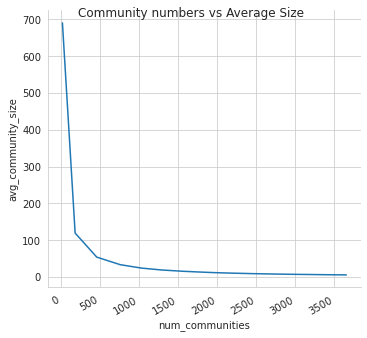

In [140]:
# Plot
sns.set_style("whitegrid")
g = sns.relplot(x="num_communities", y='avg_community_size', kind="line", data=data_subset)
g.fig.suptitle('Community numbers vs Average Size')
g.fig.autofmt_xdate()

In [138]:
data_diff = data_subset.diff()
data_diff['result'] = data_diff['avg_community_size']/data_diff['num_communities']

data_result = data_diff[['result']]
data_num_rands = data[["num_rands"]]
data_plot = data_num_rands.merge(data_result, left_index=True, right_index=True)
data_plot = data_plot.dropna()
data_plot['result'] = data_plot['result'] * 10
data_plot.result = data_plot.result.astype(int)

In [129]:
data = data_plot.result.values.tolist()
threshold = 1

for i in range(len(data_plot)):
    if data_plot.result.iloc[i] == 0 or data_plot.result.iloc[i] > 0:
        optime_num_rands = data_plot.num_rands.iloc[i]
        break
    else:
        continue
optime_num_rands

15